# Load Gene Onotology

In [1]:
from ddot import Ontology
go = Ontology.read_pickle("~/ontoPrune/data/prune_go.pickle")

# Load Term Entropy

In [2]:
import pandas as pd
term_entropy = pd.read_pickle('~/ontoPrune/data/term_entropy.pickle')
term_entropy.head()

,direct gene count,indirect gene count,term count,normalized entropy,name,level,depth
GO:0000002,12.0,22,1.0,0.734947,mitochondrial genome maintenance,5,5
GO:0000003,5.0,1462,3.0,0.517207,reproduction,1,1
GO:0000010,2.0,2,0.0,1.000000,trans-hexaprenyltranstransferase activity,4,4
GO:0000012,12.0,13,2.0,0.969207,single strand break repair,6,8
GO:0000014,10.0,11,1.0,0.963938,single-stranded DNA endodeoxyribonuclease acti...,5,7


Text(0.5, 0, 'entropy')

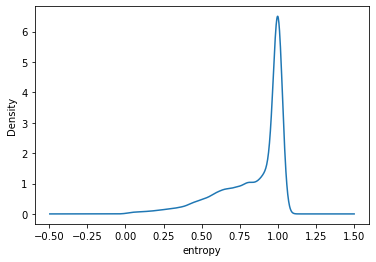

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
term_entropy['normalized entropy'].plot.density()
plt.xlabel('entropy')

In [34]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Check structure!

In [30]:
import numpy as np
import sys
sys.path.append('/cellar/users/hsher/ontoPrune')
from ontoPrune.prune import *
from ontoPrune.util import *


# use a set of terminal terms as an approximate of level and depth
terminal_terms = term_entropy.loc[term_entropy['level'] == term_entropy['level'].max()].index
# cellular components are not that deep so the above list does not contain for it
cc_index = go.connected(ancestors = 'GO:0005575', descendants = term_entropy.sort_values(by = 'level').index[-50:])
cc_index = [term_entropy.sort_values(by = 'level').index[-50:][i]for i in range(len(cc_index)) if cc_index[i] == True]
terminal_terms = cc_index + terminal_terms.tolist()




# start killing terms from low entropy

In [35]:
root_path = '~/ontoPrune/data/'
# try ent_thres
ent_thres = np.arange(start = 0.05, stop = 1, step = 0.05)

rlist = []
nlist = []

for e in ent_thres:
    print('pruning for entropy threshold {} '.format(e))
    d0, n_term_deleted = delete_term_by_entropy(go, term_entropy, e)
    # save to file
    d0.to_pickle(root_path + 'prune_go_{:.2f}'.format(e))
    path_stat, n_stat = check_ontology_structure(d0, terminal_terms)
    rlist.append(path_stat)
    nlist.append(n_stat + [e,n_term_deleted])

pruning for entropy threshold 0.05 
pruning for entropy threshold 0.1 
pruning for entropy threshold 0.15000000000000002 
pruning for entropy threshold 0.2 
pruning for entropy threshold 0.25 
pruning for entropy threshold 0.3 
pruning for entropy threshold 0.35000000000000003 
pruning for entropy threshold 0.4 
pruning for entropy threshold 0.45 
pruning for entropy threshold 0.5 
pruning for entropy threshold 0.55 
pruning for entropy threshold 0.6000000000000001 
pruning for entropy threshold 0.6500000000000001 
pruning for entropy threshold 0.7000000000000001 
pruning for entropy threshold 0.7500000000000001 
pruning for entropy threshold 0.8 
pruning for entropy threshold 0.8500000000000001 
pruning for entropy threshold 0.9000000000000001 
pruning for entropy threshold 0.9500000000000001 


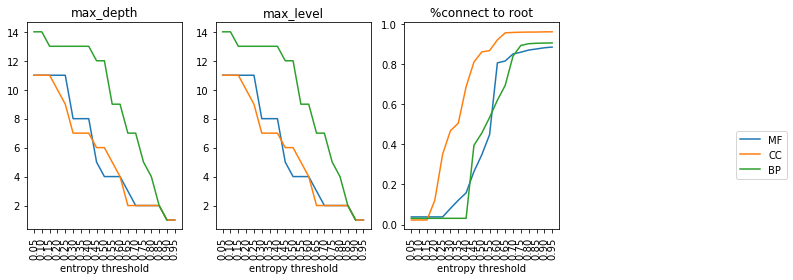

In [36]:
stat_per_root = np.stack(rlist) # depth stats per root
stat_per_root.shape # threshold*item*three roots
stat_name = ['max_depth', 'max_level', '%connect to root']
root_name = ['MF', 'CC', 'BP']
ent = ['{:.2f}'.format(e) for e in ent_thres]

# I want a figure of 3*8 stats
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

fig,ax = plt.subplots(1,3, sharex = True, figsize = (12,4))
ax = ax.flatten()


for j in range(3):
    for i in range(3):
        ax[j].plot(stat_per_root[:,j,i], label = root_name[i])
        
        
    ax[j].set_title(stat_name[j])
    ax[j].xaxis.set_ticks(np.arange(len(ent)))
    ax[j].set_xticklabels(ent, rotation = 90)
    ax[j].set_xlabel('entropy threshold')
    #ax[j].xaxis.set_major_formatter(FormatStrFormatter('%g'))
plt.legend(loc='upper right', bbox_to_anchor=(2.5, 0.5))
plt.tight_layout()

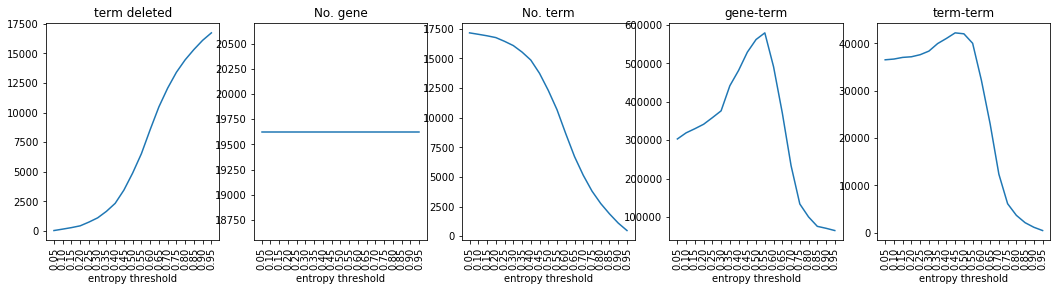

In [37]:
ont_stat_name = ['No. gene', 'No. term', 'gene-term', 'term-term', 'entropy_threshold', 'term deleted']
ont_stat = np.stack(nlist)
fig,ax = plt.subplots(1,5, sharex = True, figsize = (18,4))
i = 0
for stat in [5,0,1,2,3]:
    ax[i].plot(ont_stat[:,stat])
    ax[i].set_title(ont_stat_name[stat])
    ax[i].xaxis.set_ticks(np.arange(len(ent)))
    ax[i].set_xticklabels(ent, rotation = 90)
    ax[i].set_xlabel('entropy threshold')
    i+= 1
    